# Import Libraries

In [1]:
%pip install verilogae

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement verilogae (from versions: none)
ERROR: No matching distribution found for verilogae


In [1]:
import verilogae
import numpy as np
import matplotlib.pyplot as plt
# import eehemt
# import bsimcmg

# Load EEHEMT model

In [3]:
# model  = eehemt
# model =verilogae.load('./bsimcmg_chyoto/bsimcmg.va')
# model =verilogae.load('./bsimcmg_fromDarsen/bsimcmg.va')
# model =verilogae.load('./eehemt/soimg_20081222_yaosj.va')
model =verilogae.load('/home/u5977862/DRL-on-parameter-extraction/eehemt/eehemt114_2.va')

model.functions

Finished building eehemt114_2.va in 0.22s


{'Vds2': <verilogae.VaeFun at 0x7f4f049935d0>,
 'Vgs2': <verilogae.VaeFun at 0x7f4f04993290>,
 'Vds': <verilogae.VaeFun at 0x7f4f04993770>,
 'Vgs': <verilogae.VaeFun at 0x7f4f04993840>,
 'Vgs1': <verilogae.VaeFun at 0x7f4f04993910>,
 'Vts': <verilogae.VaeFun at 0x7f4f049939e0>,
 'Vt': <verilogae.VaeFun at 0x7f4f04993ab0>,
 'Vg': <verilogae.VaeFun at 0x7f4f04993b80>,
 'Vx': <verilogae.VaeFun at 0x7f4f04993c50>,
 'Igs': <verilogae.VaeFun at 0x7f4f04993d20>,
 'Igd': <verilogae.VaeFun at 0x7f4f04993df0>,
 'Ids': <verilogae.VaeFun at 0x7f4f04993ec0>,
 'WJcheck': <verilogae.VaeFun at 0x7f4f043b0100>,
 'Deltgm_N': <verilogae.VaeFun at 0x7f4f043b01d0>,
 'I_ds': <verilogae.VaeFun at 0x7f4f043b02a0>,
 'Vc': <verilogae.VaeFun at 0x7f4f043b0370>,
 'Vb': <verilogae.VaeFun at 0x7f4f043b0440>,
 'Va': <verilogae.VaeFun at 0x7f4f043b0510>,
 'Idsv_All': <verilogae.VaeFun at 0x7f4f043b05e0>,
 'tempsqrt': <verilogae.VaeFun at 0x7f4f043b06b0>,
 'Idsvtemp': <verilogae.VaeFun at 0x7f4f043b0780>,
 'gmoff': <v

In [10]:
#Evaluate ids
# for bsimcmg_old
vgs    = np.linspace(0, 1, 101)
vds    = np.full_like(vgs, 0.1)
ves    = np.full_like(vgs, 0.0)
sweep_bias = {
        'br_gsi': vgs,
        'br_disi': vds,
        'br_t': vgs,
        'br_esi': vgs
}


print(f"vds:\ntype: {type(vds)}\n{vds}")
modelcard = {name : param.default for (name, param) in model.modelcard.items()}

# modelcard['Deltgm'] = 0.252
# modelcard['Rd'] = 1
# modelcard['Rs'] = 2
# modelcard['Gamma'] = 0.0095
# modelcard['Vch'] = 1.4
# modelcard['Nbr'] = 8.6()

modelcard['LENGTH'] = 10000*10**(-9)
modelcard['TFIN'] = 55*10**(-9)
modelcard['NF'] = 20

# TFIN
# NF
# LENGTH=25n 
# print(modelcard['LENGTH'])

print("Parameters")
print(f"#params: {len(modelcard)}")
for mc_dict in modelcard:
    print("%s = %.2e" % (mc_dict, modelcard[mc_dict]))

# Idsvtemp=Deltgm_N*(0.5*((Vb-Vc)*tempsqrt+*Alpha*ln(((Vb-Vc)+tempsqrt)/*(Vb-Vc));
# Idsv_All=a/(b+1)*((pow((Vgs-Va),(b+1.0))-pow(Vba,(b+1.0))))+gmoff*(Vgs-Vb)+Idsvtemp; 
# eehemt :Vb,Vc,tempsqrt =[0]
# id_temp = model.functions['ids'].eval(
#     temperature = 300,
#     voltages = sweep_bias,
#     **modelcard
# )
# print(id_temp)

vds:
type: <class 'numpy.ndarray'>
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Parameters
#params: 184
LENGTH = 1.00e-05
XL = 0.00e+00
DTL = 0.00e+00
LINT = 0.00e+00
LL = 0.00e+00
LLN = 1.00e+00
LLC = 0.00e+00
DLC = 0.00e+00
EOT = 9.00e-10
TFIN = 5.50e-08
HFIN = 3.50e-08
FECH = 1.00e+00
DELTAW = 0.00e+00
FECHCV = 1.00e+00
DELTAWCV = 0.00e+00
NBODY = 1.00e+22
LNBODY = 0.00e+00
PHIG = 4.61e+00
LPHIG = 0.00e+00
EPSROX = 3.90e+00
EPSRSUB = 1.19e+01
EASUB = 4.05e+00
NI0SUB = 1.45e+16
BG0SUB = 1.16e+00
NC0SUB = 2.86e+25
NF = 2.00e+01
NSD = 2.00e+26
LNSD = 0.00e+00
CIT = 0.00e+00
LCIT = 0.00e+00
CDSC = 7.00e-03
LCDSC = 0.00e+00
CDSC

In [6]:
id_temp = model.functions['ids'].eval(
    temperature = 300,
    voltages = sweep_bias,
    **modelcard
)
id_ = id_temp
print(f"Idsvtemp:\n{id_}")
# id_ = id_temp*1000000/(2*50)
# id_ = id_temp*15000

Idsvtemp:
[7.11005332e-15 1.04681587e-14 1.54123073e-14 2.26915919e-14
 3.34089114e-14 4.91880533e-14 7.24197335e-14 1.06623799e-13
 1.56982525e-13 2.31125759e-13 3.40286897e-13 5.01004761e-13
 7.37629230e-13 1.08601006e-12 1.59892756e-12 2.35408732e-12
 3.46588892e-12 5.10274887e-12 7.51259622e-12 1.10603901e-11
 1.62833148e-11 2.39719507e-11 3.52895846e-11 5.19474379e-11
 7.64617242e-11 1.12530102e-10 1.65581586e-10 2.43576856e-10
 3.58166578e-10 5.26354292e-10 7.72854996e-10 1.13338090e-09
 1.65909749e-09 2.42242676e-09 3.52415066e-09 5.10129666e-09
 7.33455984e-09 1.04532795e-08 1.47358718e-08 2.05048145e-08
 2.81176662e-08 3.79577007e-08 5.04278400e-08 6.59495264e-08
 8.49655082e-08 1.07943743e-07 1.35379160e-07 1.67790565e-07
 2.05711186e-07 2.49672956e-07 3.00186129e-07 3.57716911e-07
 4.22665821e-07 4.95348025e-07 5.75972341e-07 6.64662202e-07
 7.61470021e-07 8.66283807e-07 9.78921820e-07 1.09911722e-06
 1.22652893e-06 1.36075311e-06 1.50133466e-06 1.64777972e-06
 1.79957414e-0

# Plot

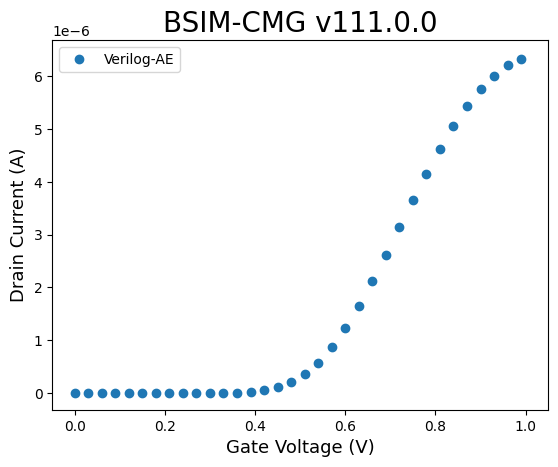

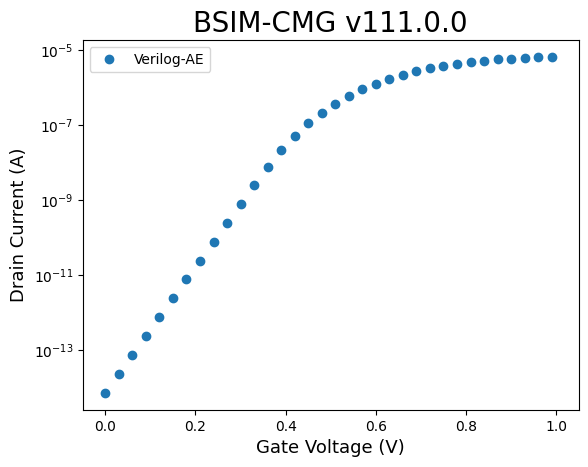

In [7]:
plt.figure()
plt.title("BSIM-CMG v111.0.0", fontsize=20)
plt.xlabel("Gate Voltage (V)", fontsize=13)
plt.ylabel("Drain Current (A)", fontsize=13)
plt.plot(vgs, id_, label='Verilog-AE', markevery=3, linestyle=' ', marker='o')
plt.legend()

plt.figure()
plt.title("BSIM-CMG v111.0.0", fontsize=20)
plt.xlabel("Gate Voltage (V)", fontsize=13)
plt.ylabel("Drain Current (A)", fontsize=13)
plt.plot(vgs, id_, label='Verilog-AE', markevery=3, linestyle=' ', marker='o')
plt.yscale('log')
plt.legend()

# Fitting

In [ ]:
from mtds.helper import *

temp =300

Fit_Lin_Sat_paras = [['Deltgm','Rd','Rs','Gamma','Vch']]

Init_Lin_Sat_val = [[0.252, 1, 2, 0.0095, 1.4]]

linear_param_bounds=[([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf],[np.inf, np.inf, np.inf, np.inf, np.inf])]

states = ["linear"]

import verilogae
model =verilogae.load('./eehemt/soimg_20081222_yaosj.va')
modelcard = {name : param.default for (name,param) in model.modelcard.items()}

In [9]:
def getIV1 (file):
    
    df = pd.read_csv(file)
    Id = df.id.values/(1000000/(2*25))    # mA/mm to A
#     Id = df.id.values/(14500)    # mA/mm to A
    
    Vg = df.vg.values
#     b[0] =  1.5
#     b = file.split("_")  
#     b = b[2].split(".csv") 
    display(df)
#     print('Vds = ',float(b[0]))  
    
#     return Id, Vg, float(b[0])
    return Id, Vg, 1.5

,vg,id
0,-0.300,0.000118
1,-0.275,0.000072
2,-0.250,0.000049
3,-0.225,0.000035
4,-0.200,0.000025
...,...,...
56,1.100,520.400000
57,1.125,532.600000
58,1.150,543.280000
59,1.175,552.120000


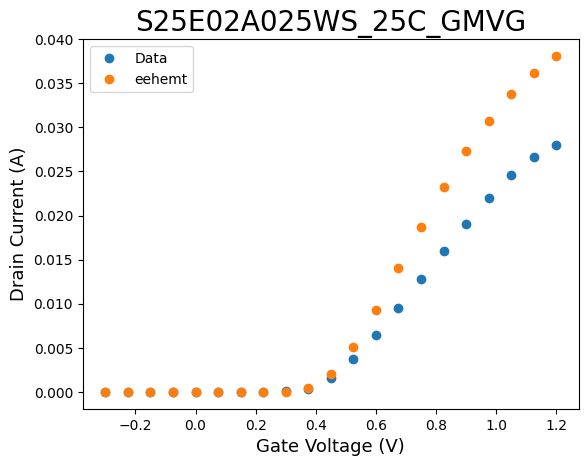

In [ ]:
files = ["./S25E02A025WS_25C_GMVG.csv"]
Id, Vg, Vds = getIV1(files[0])
_fig = plt.figure()
plt.title("S25E02A025WS_25C_GMVG", fontsize=20)
plt.xlabel("Gate Voltage (V)", fontsize=13)
plt.ylabel("Drain Current (A)", fontsize=13)
plt.plot(Vg, Id, label='Data', markevery=3, linestyle=' ', marker='o')
plt.plot(vgs, id_, label='eehemt', markevery=3, linestyle=' ', marker='o')
#    plt.plot(x, y_sim  ,label=comparsion,linestyle='-')
#    if y_log:
#        plt.yscale('log')
plt.legend()

******************************
******* linear fitting *******


,vg,id
0,-0.300,0.000118
1,-0.275,0.000072
2,-0.250,0.000049
3,-0.225,0.000035
4,-0.200,0.000025
...,...,...
56,1.100,520.400000
57,1.125,532.600000
58,1.150,543.280000
59,1.175,552.120000


1232 0
=== Initial parameters ===
Deltgm  =  0.18844192864181875
Rd  =  0.9999999999999954
Rs  =  2.0000000000000133
Gamma  =  9.287326039974102e-06
Vch  =  1174.5286692893999
=== Optimized parameters ===
Deltgm  =  0.3906768128100212
Rd  =  0.9999999999999086
Rs  =  2.0000000000001137
Gamma  =  3.282462450846059e-05
Vch  =  1596.6256590676003


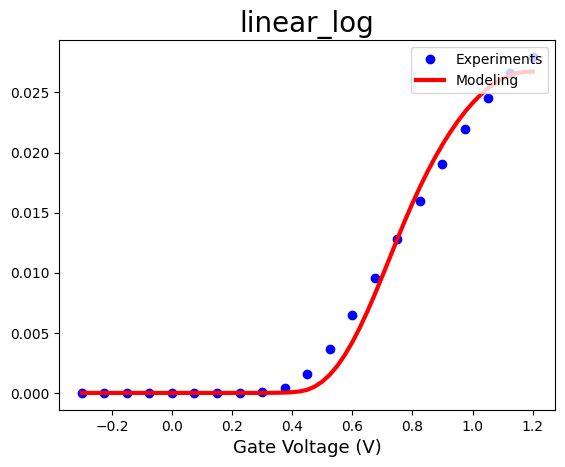

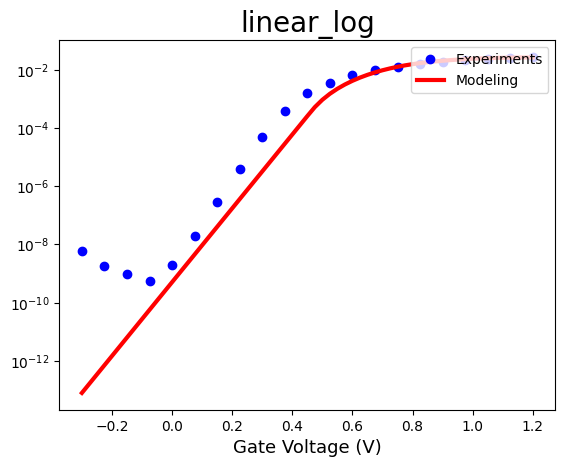

[7.82360856e-14 1.62452189e-13 3.37321500e-13 7.00426353e-13
 1.45439018e-12 3.01994746e-12 6.27072625e-12 1.30207589e-11
 2.70367666e-11 5.61401031e-11 1.16571306e-10 2.42052803e-10
 5.02607043e-10 1.04363113e-09 2.16703278e-09 4.49970388e-09
 9.34334509e-09 1.94008539e-08 4.02846226e-08 8.36484222e-08
 1.73690557e-07 3.60657247e-07 7.48881527e-07 1.55500422e-06
 3.22886604e-06 6.70453222e-06 1.39215290e-05 2.89071577e-05
 6.00238498e-05 1.24635655e-04 2.58797905e-04 5.26437511e-04
 9.40687963e-04 1.51134330e-03 2.24803126e-03 3.15251401e-03
 4.21860473e-03 5.43246065e-03 6.77323887e-03 8.21408372e-03
 9.72339904e-03 1.12663477e-02 1.28141191e-02 1.43376509e-02
 1.57817966e-02 1.71381078e-02 1.84054329e-02 1.95833981e-02
 2.06718352e-02 2.16706540e-02 2.25798005e-02 2.33992400e-02
 2.41289485e-02 2.47689091e-02 2.53191092e-02 2.57795393e-02
 2.61501919e-02 2.64310612e-02 2.66221425e-02 2.67234318e-02
 2.67349259e-02]
RMS = 7.888342330147766 %


In [ ]:
N=0

for file, Fit_paras, Init_val, param_bounds, state in zip(files, Fit_Lin_Sat_paras, Init_Lin_Sat_val, linear_param_bounds, states):
    print('******************************')
    print('*******', state, 'fitting *******')
    
    Id, Vg, Vds = getIV1(file)
    Idd = Id
    print(1232, N)
    
    updated_paras, Id_fit = BSIM_fit(Idd, Vg, Vds, Fit_paras, Init_val, param_bounds, state, temp, modelcard)
    Init_Lin_Sat_val[N] = updated_paras
    
#     print(234, Init_Lin_Sat_val)

    RMS = rms(Id, Id_fit)
    print(Id_fit)
    print("RMS =",RMS,"%") 
    N =+1

******************************
******* linear fitting *******


,vg,id
0,-0.300,0.000118
1,-0.275,0.000072
2,-0.250,0.000049
3,-0.225,0.000035
4,-0.200,0.000025
...,...,...
56,1.100,520.400000
57,1.125,532.600000
58,1.150,543.280000
59,1.175,552.120000


1232 0
=== Initial parameters ===
Deltgm  =  0.3906768128100212
Rd  =  0.9999999999999086
Rs  =  2.0000000000001137
Gamma  =  3.282462450846059e-05
Vch  =  1596.6256590676003
=== Optimized parameters ===
Deltgm  =  0.3906768128100212
Rd  =  0.9999999999999086
Rs  =  2.0000000000001137
Gamma  =  3.282462450846059e-05
Vch  =  1596.6256590676003


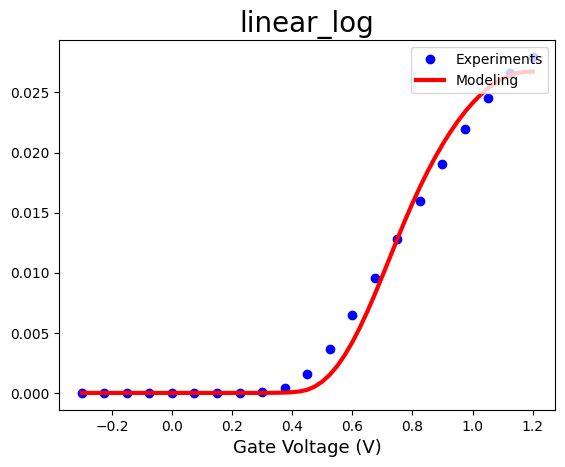

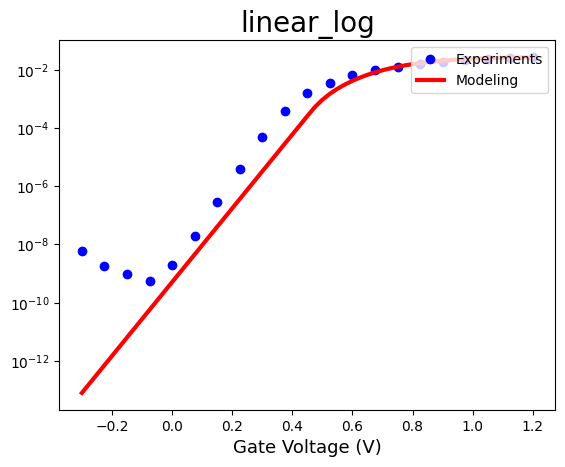

=== Initial parameters ===
Deltgm  =  0.3906768128100212
Rd  =  0.9999999999999086
Rs  =  2.0000000000001137
Gamma  =  3.282462450846059e-05
Vch  =  1596.6256590676003
=== Optimized parameters ===
Deltgm  =  0.3906768128100212
Rd  =  0.9999999999999086
Rs  =  2.0000000000001137
Gamma  =  3.282462450846059e-05
Vch  =  1596.6256590676003


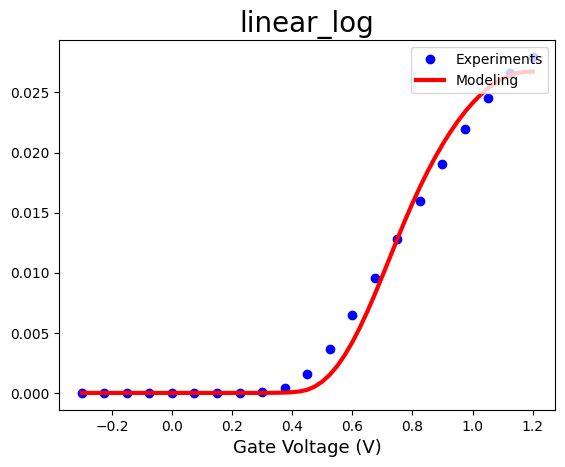

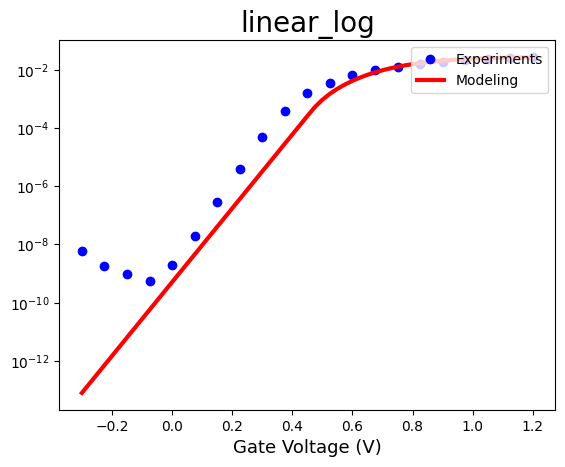

[7.82360856e-14 1.62452189e-13 3.37321500e-13 7.00426353e-13
 1.45439018e-12 3.01994746e-12 6.27072625e-12 1.30207589e-11
 2.70367666e-11 5.61401031e-11 1.16571306e-10 2.42052803e-10
 5.02607043e-10 1.04363113e-09 2.16703278e-09 4.49970388e-09
 9.34334509e-09 1.94008539e-08 4.02846226e-08 8.36484222e-08
 1.73690557e-07 3.60657247e-07 7.48881527e-07 1.55500422e-06
 3.22886604e-06 6.70453222e-06 1.39215290e-05 2.89071577e-05
 6.00238498e-05 1.24635655e-04 2.58797905e-04 5.26437511e-04
 9.40687963e-04 1.51134330e-03 2.24803126e-03 3.15251401e-03
 4.21860473e-03 5.43246065e-03 6.77323887e-03 8.21408372e-03
 9.72339904e-03 1.12663477e-02 1.28141191e-02 1.43376509e-02
 1.57817966e-02 1.71381078e-02 1.84054329e-02 1.95833981e-02
 2.06718352e-02 2.16706540e-02 2.25798005e-02 2.33992400e-02
 2.41289485e-02 2.47689091e-02 2.53191092e-02 2.57795393e-02
 2.61501919e-02 2.64310612e-02 2.66221425e-02 2.67234318e-02
 2.67349259e-02]
RMS = 7.888342330149205 %


In [ ]:
N=0

for file, Fit_paras, Init_val, param_bounds, state in zip(files, Fit_Lin_Sat_paras, Init_Lin_Sat_val, linear_param_bounds, states):
    print('******************************')
    print('*******', state, 'fitting *******')
    
    Id, Vg, Vds = getIV1(file)
    Idd = Id
    print(1232, N)
    
    updated_paras, Id_fit = BSIM_fit(Idd, Vg, Vds, Fit_paras, Init_val, param_bounds, state, temp, modelcard)
    Init_Lin_Sat_val[N] = updated_paras
    updated_paras, Id_fit = BSIM_fit(Idd, Vg, Vds, Fit_paras, Init_val, param_bounds, state, temp, modelcard)
    Init_Lin_Sat_val[N] = updated_paras
    
#     print(234, Init_Lin_Sat_val)

    RMS = rms(Id, Id_fit)
    print(Id_fit)
    print("RMS =",RMS,"%") 
    N =+1